In [25]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [49]:
# Load dataset
df = pd.read_csv('Data/kurla_cleaned.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone', 'RH', 'WS', 'WD',
       'AT', 'Date'],
      dtype='object')

In [39]:
# Extract Date column
dates = df['Date']

In [40]:
# Remove the 'Date' columns
df = df.drop(['Date'], axis=1)

In [41]:
# Separate target variable
y = df['PM2.5']
X = df.drop(['PM2.5'], axis=1)

In [42]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42)

In [44]:
# Fit the model on training data
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [45]:
# Make predictions on test data
y_pred = xgb_model.predict(X_test)

In [46]:
# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

RMSE: 18.740935046112586


In [47]:
# Set range of dates to 100 values
date_indices = np.linspace(-len(y_test), -1, 100, dtype=int)

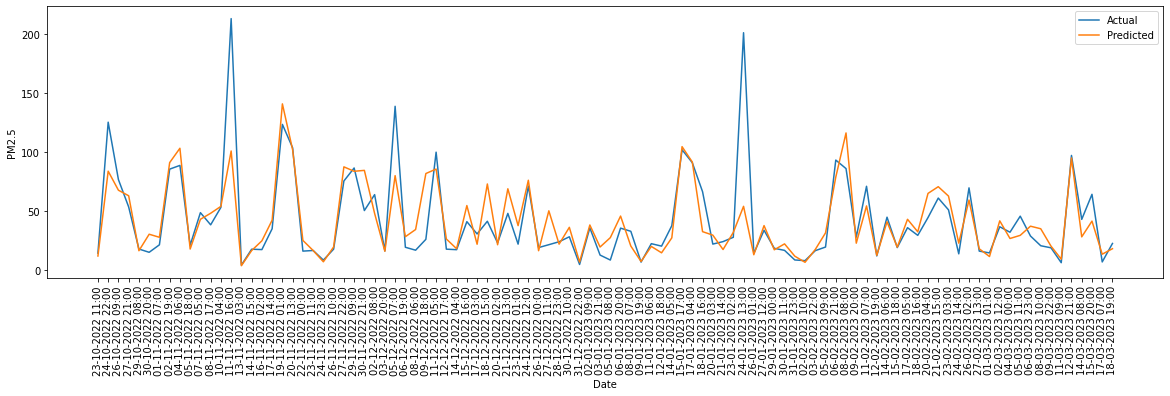

In [48]:
# Plot actual vs predicted values
plt.subplots(figsize=(20, 5))
plt.plot(dates.iloc[date_indices], y_test.iloc[date_indices], label='Actual')
plt.plot(dates.iloc[date_indices], y_pred[date_indices], label='Predicted')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.xticks(rotation=90)
plt.legend()
plt.show()
